
## Programming for Data Science

### Lecture 12: Machine Learning in Python using scikit-learn

### Instructor: Farhad Pourkamali 


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/ProgrammingForDataScience/blob/main/Lecture12_ML.ipynb)


### Why use machine learning?
<hr style="border:2px solid gray">

* Let's design a system for predicting *bank loan default* based on several *features*, such as income and debt

    * Classical programming: write down step-by-step instructions or rules 
    * Machine learning: figure out what the rules should be 
    
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/rules.png?raw=true" width=650>    

* A machine learning system is *trained* rather than being explicitly programmed
    * Benefits
        + Easier to develop/maintain 
        + More accurate
    * Challenges
        + We need features *and* responses, i.e., labeled data 
        + Can human users understand and trust these rules? 
        
* In machine learning, *data labeling* involves assigning informative labels to raw data like images, text files, or videos


* Machine learning moves beyond the confines of traditional statistical techniques and optimization algorithms
    * Must handle large and complex data sets 
    * Requires a combination of **math and coding** skills 

* Thus, it is essential to be proficient in Python, scientific computing, and machine learning libraries to prepare data sets, implement algorithms, train models, and evaluate them


### Learning rules and representations from data
<hr style="border:2px solid gray">

* Let us revisit the bank loan default example
    * We have some data points represented by their coordinates in $\mathbb{R}^2$
* Goal: develop a machine learning system that can take the coordinates $(x_1,x_2)$ of a sample and predict the label or outcome

    * We can use logistic regression to solve this classification problem and find the classification rule

<img src="
https://github.com/farhad-pourkamali/MATH6388/blob/main/images/bank_logreg.png?raw=true" width=350>    

* What if we have a more extensive set of features? Debt, income, gender, occupation, photo, etc.
    * Most interesting applications of machine learning involve
        + High-dimensional data (e.g., thousands or millions of features)
        + Limited labeled data availability
        + High-risk, high-reward investments
    * Thus, modern machine learning (and deep learning) can be defined as finding suitable *data representations* and *mappings from inputs to outputs* using a feedback signal

### Multistage way to learn data representations and find mappings 
<hr style="border:2px solid gray">

* While specific implementations might vary depending on the algorithm and framework being used, here's a general overview of the training loop for machine learning models

<img src="
https://github.com/farhad-pourkamali/MATH6388/blob/main/images/ml_general.png?raw=true" width=700>


### Categorization of machine learning algorithms based on two criteria
<hr style="border:2px solid gray">

1. Data Supervision

    * Supervised Learning
        + The algorithm is trained on labeled data, where the input data is paired with the correct output
    
    * Unsupervised Learning
       + The algorithm is trained on unlabeled data, where the goal is to find hidden patterns or structure in the data, such as clustering or dimensionality reduction
    
    *  Semi-Supervised Learning
        + This is a combination of supervised and unsupervised learning, where the algorithm is trained on a mix of labeled and unlabeled data
        
2. Model Complexity

    * Linear Models
        + These models assume a linear relationship between the input features and the output
    * Non-linear Models
        + These models can capture more complex relationships between the inputs and outputs, such as neural networks, decision trees, etc.
    * Deep Learning
        + A subset of non-linear models, deep learning refers to models with many layers (deep neural networks) that can learn hierarchical features

### Supervised learning (making predictions)

<hr style="border:2px solid gray">

* Two types of supervised learning
    + Regression (quantitative labels) 
    + Classification (qualitative or categorical labels)
    
<img src="https://raw.githubusercontent.com/farhad-pourkamali/MATH6388/main/images/supervised.png"  height=600 align="center">



### Mathematical building blocks of machine learning
<hr style="border:2px solid gray">

* Supervised learning: learn a mapping or function $f$ from inputs (features/predictors) $\mathbf{x}\in\mathcal{X}$ to outputs $\mathbf{y}\in\mathcal{Y}$. The data set is given in the form of $N$ input-output pairs $\mathcal{D}=\{(\mathbf{x}_n,\mathbf{y}_n)\}_{n=1}^N$
    + $N$ is the sample size and the number of features is $D$, i.e., $\mathcal{X}=\mathbb{R}^D$
    + Multi-class classification: $\mathcal{Y}=\{1,2,\ldots, C\}$
    + If we have two classes only (binary classification): $\mathcal{Y}=\{0,1\}$
    


### Model fitting/training
<hr style="border:2px solid gray">

* Define *empirical risk* as the average loss on the training data (denote all unknown parameters by $\boldsymbol{\theta}$)

$$ \mathcal{L}(\boldsymbol{\theta}):=\frac{1}{N}\sum_{n=1}^N l(y_n, f(\mathbf{x}_n;\boldsymbol{\theta}))$$

where $l$ denotes the loss function 
* Example: zero-one loss $l(y, \hat{y})=I(y\neq \hat{y})$, giving misclassification rate

$$I(y\neq \hat{y})=\begin{cases}1 & \text{if } y\neq \hat{y}\\0 &\text{if } y=\hat{y} \end{cases}$$

* Empirical risk minimization (ERM): find a setting of the parameters $\boldsymbol{\theta}$ that minimizes the empirical risk

$$ \underset{\boldsymbol{\theta}}{\operatorname{argmin}} \mathcal{L}(\boldsymbol{\theta})=\underset{\boldsymbol{\theta}}{\operatorname{argmin}} \frac{1}{N}\sum_{n=1}^N l(y_n, f(\mathbf{x}_n;\boldsymbol{\theta}))$$


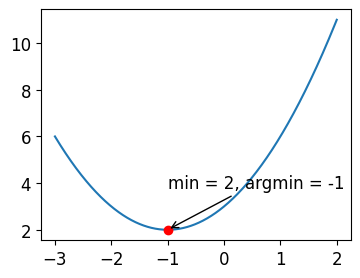

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12, "figure.figsize": (4,3)})

x = np.linspace(-3,2,1000)
y = x ** 2 + 2*x +3

plt.plot(x,y)

ind_min = np.argmin(y)

plt.plot(x[ind_min], y[ind_min],'ro')

# Annotate for "min" value
plt.annotate('min = 2, argmin = -1', xy=(-1, 2), xytext=(0, 30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->'))


plt.show()


### Loss function for regression tasks
<hr style="border:2px solid gray">

* Since the output is real-valued, the most common choice is to use quadratic loss
$$l(y,\hat{y})=(y-\hat{y})^2$$

* Empirical risk minimization
$$MSE(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N\big(y_n - f(\mathbf{x}_n;\boldsymbol{\theta})\big)^2$$

* Underlying assumption for linear regression 
$$f(\mathbf{x};\boldsymbol{\theta})=w_0+w_1x_1+\ldots+w_Dx_D=w_0+\mathbf{w}^T\mathbf{x}$$

where $\mathbf{w}=[w_1,\ldots,w_D]\in\mathbb{R}^D$, $\mathbf{x}=[x_1,\ldots,x_D]\in\mathbb{R}^D$, $\boldsymbol{\theta}=\{w_0,\mathbf{w}\}$

### Generalization

<hr style="border:2px solid gray">

* Machine learning models tend to perform worse on new data than on their training data
    * The model becomes overly specialized/sensitive to the training data (e.g., noise and randomness present in the data)

* How to evaluate machine learning models and select the best one?

* Train-Test Split
    * The data set is divided into two  parts: a training set and a test set
    * The training set is used to train the machine learning model, and the test set is used to evaluate its performance on new, unseen data

    * Training risk: $\mathcal{L}_{\text{train}}:=\frac{1}{|\mathcal{D}_{\text{train}}|}\sum_{(\mathbf{x},y)\in\mathcal{D}_{\text{train}}}l(y,f(\mathbf{x};\boldsymbol{\theta}))$

    * Test risk: $\mathcal{L}_{\text{test}}:=\frac{1}{|\mathcal{D}_{\text{test}}|}\sum_{(\mathbf{x},y)\in\mathcal{D}_{\text{test}}}l(y,f(\mathbf{x};\boldsymbol{\theta}))$

    * Overfitting happens when $\mathcal{L}_{\text{test}}\gg \mathcal{L}_{\text{train}}$

    * Caveat: If you use the test set multiple times, you might end up overfitting to the test set itself
    
     <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/train_test.png?raw=true" width=280>
    



### Example
<hr style="border:2px solid gray">

Let us create a synthetic 1D regression problem with no intercept and find the slope, we'll follow these steps:

1. Generate synthetic data that follows a linear relationship $y=mx$, where $m$ is the slope. We add some Gaussian noise. 
2. Split the data into training and testing sets.
3. Solve for the slope $m$ using the derivative approach.
4. Solve for the slope $m$ using linear regression from `sklearn.linear_model.LinearRegression` by forcing the intercept to 0.
5. Predict $y$ values for the testing set. 

#### Step 1: Generate Synthetic Data

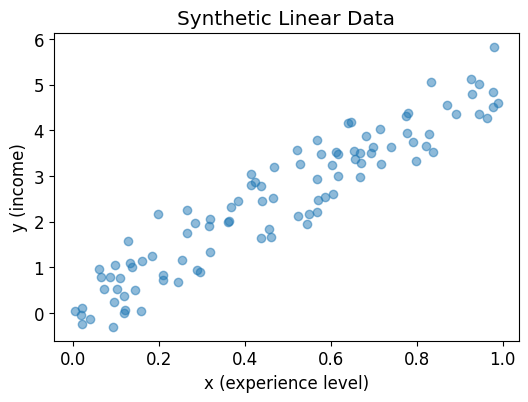

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
x = np.random.rand(100, 1)  # 100 data points in 1D
m_true = 5  # True slope
y = m_true * x  # Linear relationship with no intercept

# Add some noise
y += np.random.normal(scale=0.5, size=y.shape)

# Plot the synthetic data
plt.rcParams.update({'font.size': 12, "figure.figsize": (6,4)})
plt.scatter(x, y, alpha=0.5)
plt.title("Synthetic Linear Data")
plt.xlabel("x (experience level)")
plt.ylabel("y (income)")
plt.show()

In [3]:
print(x.shape, y.shape)

(100, 1) (100, 1)


#### Step 2: Split the Data into Training and Testing Sets

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80, 1) (20, 1)


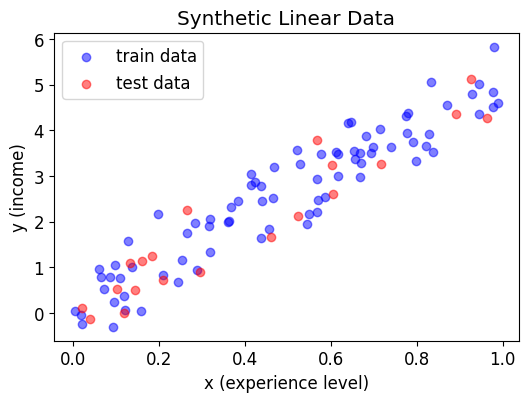

In [5]:
# Plot the synthetic data
plt.rcParams.update({'font.size': 12, "figure.figsize": (6,4)})
plt.scatter(x_train, y_train, c='b', alpha=0.5, label='train data')
plt.scatter(x_test, y_test, c='r', alpha=0.5, label='test data')
plt.title("Synthetic Linear Data")
plt.xlabel("x (experience level)")
plt.ylabel("y (income)")
plt.legend()
plt.show()

#### Step 3: Solve for the Slope Using the Derivative Approach

* To find the slope $m$ using the derivative, we minimize the cost function (assume that we have $N$ training data points)

$$\mathcal{L}(m)=\frac{1}{N}\sum_{(x_n, y_n)\in\mathcal{D}_{\text{train}}}\big(mx_n - y_n\big)^2$$

* The derivative of $\mathcal{L}(m)$ with respect to $m$ gives us 

$$\frac{d \mathcal{L}(m)}{d m}=\frac{2}{N} \sum_{(x_n, y_n)\in\mathcal{D}_{\text{train}}}\big(mx_n - y_n\big)x_n$$

* Setting this derivative to 0 and solving for $m$ gives 

$$m=\frac{\sum_{(x_n, y_n)\in\mathcal{D}_{\text{train}}} x_ny_n}{\sum_{(x_n, y_n)\in\mathcal{D}_{\text{train}}} x_n^2}$$

In [6]:
# Derivative approach to find the slope
m_estimated = np.sum(x_train * y_train) / np.sum(x_train**2)

print(f"Estimated slope using derivative approach: {m_estimated}")

Estimated slope using derivative approach: 5.183202715013447


#### Step 4: Solve for the Slope Using Linear Regression from sklearn

* The `sklearn.linear_model` module is part of scikit-learn (sklearn), a popular Python library for machine learning. This module provides a wide range of linear models for both regression and classification tasks. 

In [7]:
from sklearn.linear_model import LinearRegression

# Linear regression model, forcing no intercept
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(x_train, y_train)

# The coefficient is the slope since we forced no intercept
m_sklearn = lin_reg.coef_

print(f"Estimated slope using sklearn LinearRegression: {m_sklearn}")


Estimated slope using sklearn LinearRegression: [[5.18320272]]


#### Comparing Results

Finally, we can plot the regression lines obtained from both methods along with the test data to visually assess the fit.

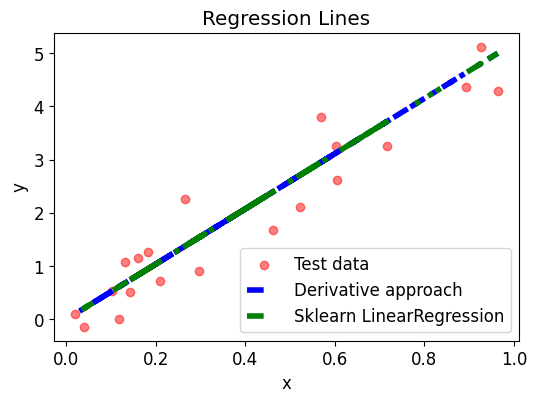

In [8]:
plt.scatter(x_test, y_test, c='r', alpha=0.5, label="Test data")
plt.plot(x_test, m_estimated * x_test, color="blue",
         linestyle=(0, (3, 5, 1, 5, 1, 5)), linewidth=4, label="Derivative approach")
plt.plot(x_test, m_sklearn * x_test, color="green",
         linestyle=(0, (3, 10, 1, 10)), linewidth=4, label="Sklearn LinearRegression")
plt.title("Regression Lines")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### How to use sklearn?

* The workflow for model fitting and prediction using scikit-learn (sklearn) for supervised learning tasks is standardized and straightforward, making it easy to apply across various models and datasets. 

1. Choose a Model
    * Select a suitable model from scikit-learn based on the type of supervised learning problem at hand (regression or classification). For example, `LinearRegression` for a regression problem, or `LogisticRegression` for a binary classification problem.

2. Import the Model
    * Import the chosen model from the appropriate module within scikit-learn. For example:
    ```
    from sklearn.linear_model import LinearRegression
    ```
3. Prepare the Data
    * Your dataset should be divided into features (independent variables) and the target (dependent variable). The features are usually represented as a 2D array (or DataFrame) `X`, and the target as a 1D array `y`.
    
4. Split the Data
    * Use `train_test_split` from `sklearn.model_selection` to split your data into training and testing sets. This step is crucial for evaluating the model's performance on unseen data.
    ```
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ```
5. Initialize the Model
    * Instantiate the model with any desired parameters. For example: 
    ```
    model = LinearRegression()
    ```
6. Fit the Model
    * Train the model on your training data by calling the `fit` method.
    ```
    model.fit(X_train, y_train)

    ```
7. Make Predictions
    * Once the model is trained, use it to make predictions. For regression tasks, use the `predict` method. For classification, `predict` gives you the predicted class labels, while `predict_proba` gives you the probabilities for each class.
    ```
    predictions = model.predict(X_test)
    ```
8. Evaluate the Model
    * Assess the model's performance using appropriate metrics. For regression, common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared. For classification, you might use accuracy, precision, recall, F1 score, or AUC-ROC.
    ```
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, predictions)
    ```

### HW 12

1. What are the two primary tasks in supervised learning, and how do they differ from each other?


2. Write a Python function to manually implement the train-test split functionality using NumPy's random module. This function should take a dataset (features `X` and target `y`) as input and return the train and test sets with a specified test set size.

Tasks:

* Function Definition: Define a function named `custom_train_test_split` that accepts the following parameters:

    * X: A 2D NumPy array representing the features of the dataset.
    * y: A 1D NumPy array representing the target variable.
    * test_size: A float between 0 and 1 indicating the proportion of the dataset to include in the test split.

* Shuffling: The function should shuffle the dataset to ensure randomness. Use NumPy's random module for this purpose.

* Splitting Data: Based on the test_size, split the shuffled dataset into training and testing sets. Ensure that the corresponding X and y values remain aligned.

* Return Values: The function should return four NumPy arrays: X_train, X_test, y_train, and y_test.

* Do not use scikit-learn's train_test_split or any other pre-built train-test split functions.


In [ ]:
# test case

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 0, 1, 0])
X_train, X_test, y_train, y_test = \
    custom_train_test_split(X, y,test_size=0.25)

print(X_train,'\n\n', X_test, '\n\n', y_train,'\n\n', y_test)

3. In this assignment, you will create a one-dimensional (1D) synthetic dataset that follows a linear relationship with a specific slope and intercept. You will then apply the Linear Regression model from scikit-learn to this dataset, fit the model, and print the slope and intercept estimated by the model. This exercise will help you understand the basics of linear regression and how to implement it using scikit-learn.

Tasks:

* Generate an array X of 100 points for the independent variable, equally spaced between -10 and 10.
* Define a slope (m) and an intercept (b) for the linear equation y = mx + b. Feel free to choose any values for slope and intercept.

* Using the slope and intercept, generate the dependent variable y according to the linear equation. Add Gaussian noise to y to introduce some variance in the dataset. You can use `numpy.random.normal` to add noise.

* Use `matplotlib` to create a scatter plot of your dataset, showing the linear relationship between X and y.

* Import `LinearRegression` from `sklearn.linear_model` and initialize the Linear Regression model and fit it to your data set (X and y).

* After fitting the model, extract the slope (`coef_`) and intercept (`intercept_`) estimated by the model. Please see "Attributes" in https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

* Print the original slope and intercept you defined for generating the dataset and print the slope and intercept estimated by the Linear Regression model.

* Discuss any differences observed between the original parameters and the ones estimated by the model.

* On the same scatter plot of your data set, add the regression line predicted by the model. 


4. Use the same 1D synthetic dataset (X and y) from your previous work. This assignment explores Ridge Regression, a variant of linear regression that includes a regularization term to penalize large coefficients.

Tasks: 

* Import `Ridge` from `sklearn.linear_model`.
* Initialize a Ridge Regression model with a moderate value of alpha (e.g., alpha=1). This will serve as a baseline for comparison. Fit the model to your data set and record the slope and intercept.


* Initialize a second Ridge Regression model, this time with a large value of alpha (e.g., alpha=10000). This will demonstrate the effects of strong regularization. Fit this model to the same data set and record the slope and intercept.

* Print the slope and intercept for both models.

* Plot the regression line for the model with moderate alpha and the model with large alpha on the same graph. Use different colors or styles to differentiate the lines. Include a legend to identify each regression line.

* Based on the user guide (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), can you explain the distinction between Linear and Ridge Regression? Do you see any differences in terms of the loss/cost function?